## MDP and Dynamic Programming - Policy and value iteration

In [1]:
import pandas as pd
import numpy as np
import gymnasium as gym
from collections import defaultdict

In [2]:
env = gym.make("FrozenLake-v1",is_slippery=True)

In [3]:
state,info = env.reset()
state

0

In [4]:
env.observation_space

Discrete(16)

In [5]:
env.action_space

Discrete(4)

In [6]:
initial_policy = np.ones((16,4))/4#so shd be 16x4 with for each 0.25 prob
initial_policy

array([[0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25]])

### Policy iteration algo
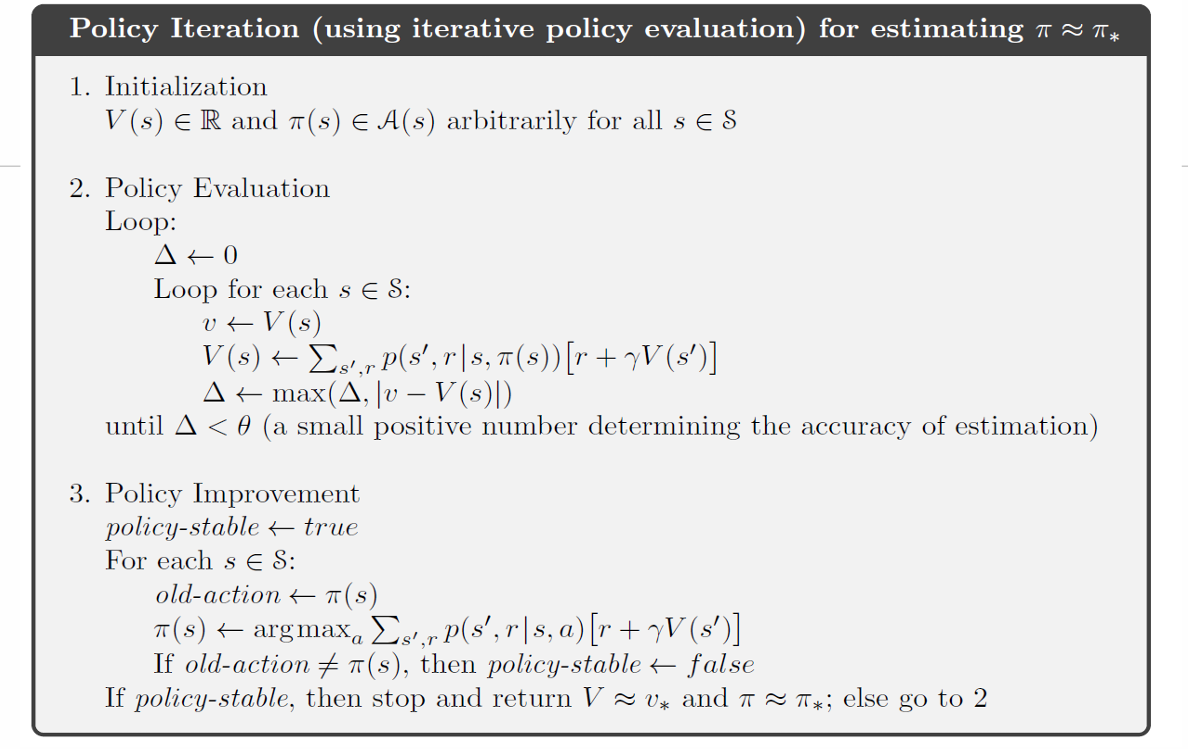

### Update equations
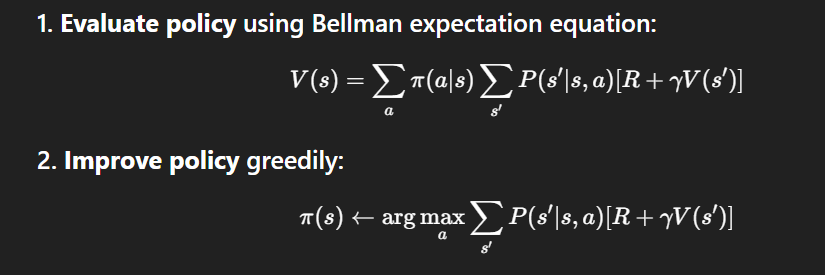

In [16]:
def policy_iteration(policy,env,gamma=0.9,theta=0.01,num_of_iterations=1000):
    if hasattr(env,"unwrapped"):
        env=env.unwrapped
    
    V = np.zeros(16)#value function for each state
    states = 16
    
    for i in range(num_of_iterations):
        #policy evaluation
        while True:
            delta = 0
            for s in range(states):
                v_old = V[s]
                v_new = 0
                for action,action_prob in enumerate(policy[s]):
                    for prob,next_state,reward,done in env.P[s][action]:
                        v_new+=action_prob*prob*(reward + gamma*V[next_state])#belman equation
                
                V[s]=v_new
                delta  = max(delta,abs(v_old-v_new))
            
            if delta < theta:
                break
    
        #policy improvement
        policy_stable = True
        for s in range(states):
            old_action = np.argmax(policy[s])
            action_values = np.zeros(4)#since 4 actions
            for action in range(4):
                for prob,next_state,reward,done in env.P[s][action]:
                    action_values[action]+=prob*(reward + gamma*V[next_state])#only action_value update and max to get best action
            
            best_action = np.argmax(action_values)
            new_policy = np.eye(4)[best_action]#create OHE vector with prob 1 at best_action index
            if not np.array_equal(new_policy,policy[s]):#instead just do argmax of new policy and check if old and new action same
                policy_stable = False
            policy[s] = new_policy
        
        if policy_stable == True:
            break#got best policy
    
    return policy,V

### Value iteration algo
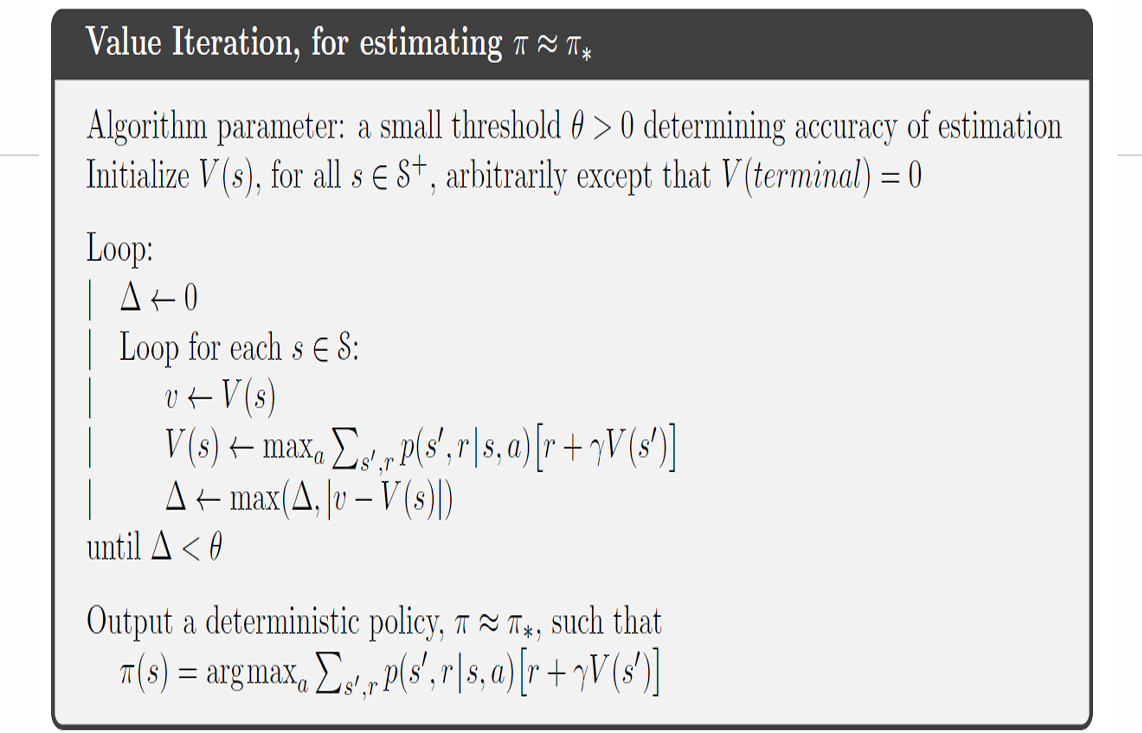

### update equations
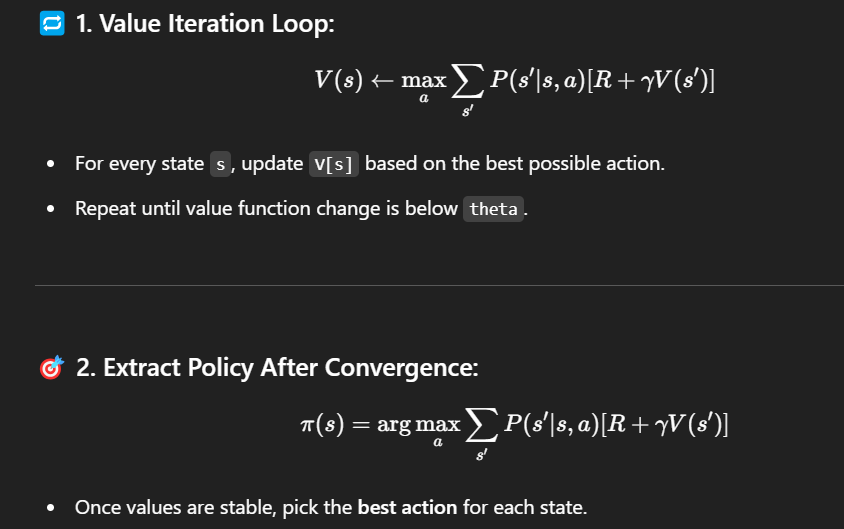

In [ ]:
def value_iteration(env,gamma,theta,num_of_iterations=1000):
    if hasattr(env,"unwrapped"):
        env = env.unwrapped
    V = np.zeros(16)
    states = 16
    for i in range(num_of_iterations):
        #greedy update so while true is not required here(IMP)
        delta = 0
        for s in range(states):
            v_old = V[s]
            v_new = 0
            action_values= np.zeros(4)#now have action values
            for action in range(4):
                for prob,next_state,reward,done in env.P[s][action]:
                    action_values[action] += prob*(reward + gamma*V[next_state])
            v_new = np.max(action_values)
            delta = max(delta, abs(v_old-v_new))
        if delta < theta:
            break
    
    #in value iteration we do after whole iteration of policy greedy update only unlike policy where for each so policy eval formula also change
    policy = np.zeros((16,4))/4
    for s in range(states):
        action_values = np.zeros(4)
        for action in range(4):
            for prob,next_state,reward,done in env.P[s][action]:
                action_values[action] += prob*(reward + gamma*V[next_state])
        best_action = np.argmax(action_values)
        policy[s] = np.eye(4)[best_action]
    
    return policy,V

In [21]:

def evaluate(env,policy,nep=1000):
    wins=0
    total_return=0
    
    for i in range(nep):
        s,_=env.reset()
        terminated=truncated=False
        episode_return=0
        while not (terminated or truncated):
            action=np.random.choice(np.arange(env.action_space.n),p=policy[s])
            s,reward,terminated,truncated,_=env.step(action)
            episode_return+=reward
            #print(reward,"  ",episode_return)
        if reward>0:
            wins+=1
        total_return+=episode_return
    return wins,total_return/nep

In [28]:
gamma=1e-6
theta=1e-8

policy,v=policy_iteration(initial_policy.copy(),env,gamma,theta,1000)
policy1,v1=value_iteration(env,gamma,theta,1000)#testing with just 10 num of episodes

In [29]:
wins,avg_ret=evaluate(env,policy,1000)
wins1,avg_ret1=evaluate(env,policy,1000)

In [30]:
wins

421

In [31]:
wins1

474

In [32]:
avg_ret

0.421

In [33]:
avg_ret1

0.474